In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [5]:
# Load the data
print("Loading and preprocessing data...")
data = pd.read_csv('processed_us_ecb_metadata.csv')

# Select features for clustering
numerical_features = [
    'floor_area_sqft',
    'number_floors',
    'building_age_yrs',
    'number_occupants',
    'number_cool_stages',
    'number_heat_stages',
    'number_remote_sensors'
]

# Create feature matrix
X = data[numerical_features].copy()

# Remove any rows with missing values
X = X.dropna()

Loading and preprocessing data...


In [6]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [7]:
# Determine optimal number of clusters using elbow method
silhouette_scores = []
K = range(2, 10)

for k in K:
    # Create and fit model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))


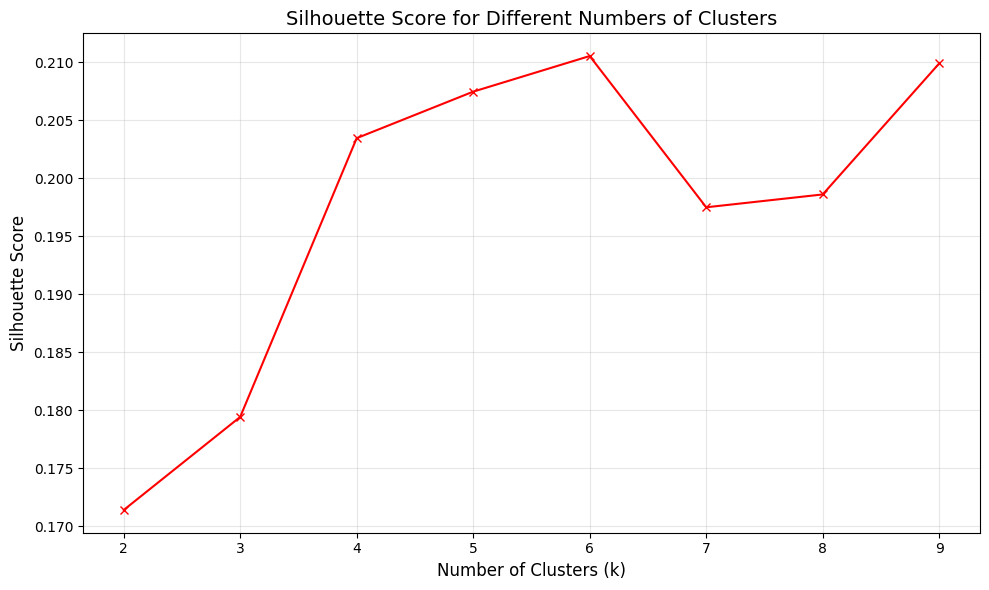

In [8]:
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score for Different Numbers of Clusters', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [9]:
# Choose optimal k based on highest silhouette score
optimal_k = K[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on highest silhouette score: {optimal_k}")

# Perform k-means clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
X['Cluster'] = clusters


Optimal number of clusters based on highest silhouette score: 6


In [10]:
# Analyze clusters
print("\nCluster Analysis:")
for i in range(optimal_k):
    print(f"\nCluster {i} Statistics:")
    cluster_data = X[X['Cluster'] == i]
    print(cluster_data[numerical_features].describe())
    print(f"Number of buildings in cluster: {len(cluster_data)}")



Cluster Analysis:

Cluster 0 Statistics:
       floor_area_sqft  number_floors  building_age_yrs  number_occupants  \
count     14573.000000   14573.000000      14573.000000      14573.000000   
mean       4068.792150       2.326769         62.079119          4.286832   
std        1538.774372       0.641779         50.280144          1.928965   
min         500.000000       1.000000          1.000000          1.000000   
25%        3000.000000       2.000000         15.000000          3.000000   
50%        4000.000000       2.000000         40.000000          4.000000   
75%        4500.000000       3.000000        120.000000          5.000000   
max       10500.000000      10.000000        120.000000         20.000000   

       number_cool_stages  number_heat_stages  number_remote_sensors  
count        14573.000000        14573.000000           14573.000000  
mean             1.053181            0.977561               1.034173  
std              0.268405            0.186650      